In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('111.csv', usecols=[1], engine='python')
dataframe=dataframe.iloc[:5000]
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[1017.],
       [1017.],
       [1017.],
       ...,
       [ 973.],
       [ 974.],
       [ 976.]], dtype=float32)

In [ ]:
#normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# print(testX.shape)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# print(testY.shape)
print(trainX[1])
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
print(model.summary())
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

NameError: ignored

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

testY=np.reshape(testY, (-1, 1))
testPredict=np.transpose(testPredict)
testY=np.transpose(testY)

print(testY.shape)
print(testPredict.shape)

(814, 1)
(814, 1)
(1, 814)
(1, 814)


In [ ]:
def sMAPE(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = numpy.reshape(a, (-1,))
    b = numpy.reshape(b, (-1,))
    return numpy.mean(100*2.0 * numpy.abs(a - b) / (numpy.abs(a) + numpy.abs(b))).item()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
forecast_errors = [testY[:,0][i]-testPredict[:,0][i] for i in range(len(testPredict[:,0]))]
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))

bias = sum(forecast_errors) * 1.0/len(testPredict[:,0])
print('Bias: %f' % bias)
mae = mean_absolute_error(testY[:,0], testPredict[:,0])
print('MAE: %f' % mae)
print('Test Score(RMSE): %.2f' % (testScore))
mse = mean_squared_error(testY[:,0], testPredict[:,0])
print('MSE: %f' % mse)
mape=sMAPE(testY[:,0], testPredict[:,0])
print('MAPE: %f' %mape)

from sklearn.metrics import accuracy_score
# print(accuracy_score(testY, testPredict, normalize=False))

Bias: -0.011991
MAE: 0.011991
Test Score(RMSE): 0.01
MSE: 0.000144
MAPE: 4.745048


accuracy, precision, recall, auc score

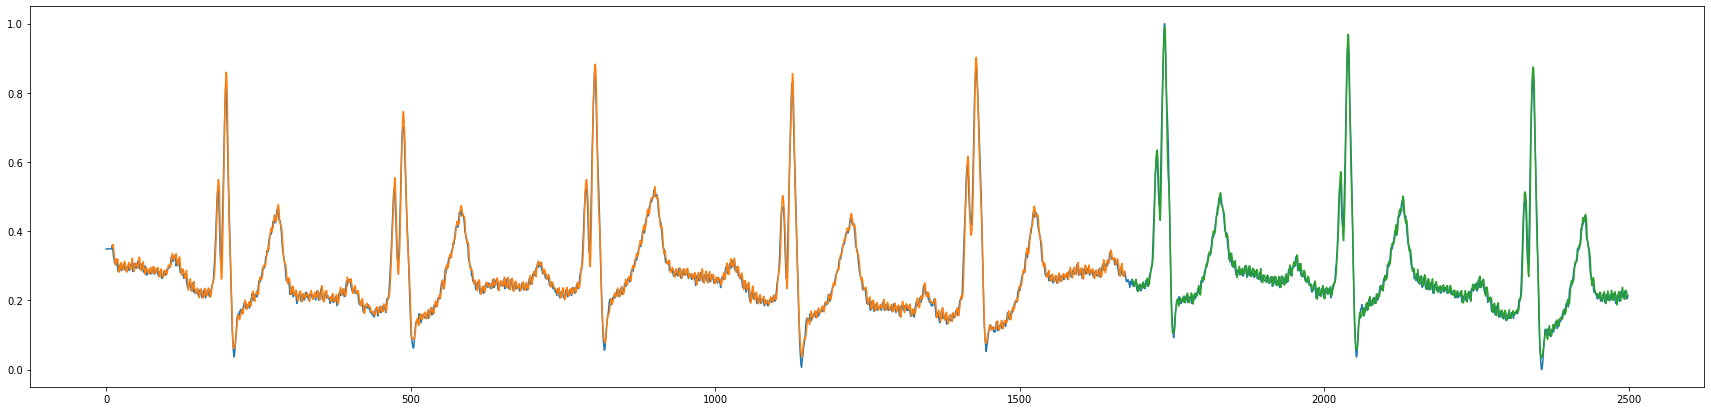

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(30,7))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import numpy as np
testPredict=np.transpose(testPredict)
print(testY.shape, testPredict.shape)

(1, 814) (1, 814)
